# **Proyecto: Análisis y Limpieza de Datos sobre Vehículos Eléctricos**

## 🎯 **Objetivo y Contexto**

El crecimiento de los vehículos eléctricos (EVs) ha sido impulsado por la necesidad de reducir las emisiones y fomentar el uso de energías limpias. Sin embargo, analizar datos de estos vehículos puede ser un desafío debido a la inconsistencia y desorden en los registros.

Este proyecto busca limpiar, transformar y analizar el dataset **"Electric Vehicle Population Data (Messy Data)"** para obtener información útil sobre la distribución, adopción y características de los vehículos eléctricos en diferentes regiones.

### 🔍 **Preguntas clave a responder:**
✅ **¿Cuáles son las marcas y modelos más populares?**  
✅ **¿Cómo ha evolucionado el registro de vehículos eléctricos a lo largo del tiempo?**  
✅ **¿Existe una relación entre el precio y la autonomía de los vehículos?**  
✅ **¿Cómo se distribuyen los vehículos eléctricos geográficamente?**  
✅ **¿Cuántos vehículos califican para incentivos de energía limpia?**  

## **1️⃣ Limpieza y Normalización de Datos**

Los datos suelen contener inconsistencias como valores faltantes, formatos incorrectos o duplicados. En esta sección, nos enfocaremos en:

### 📌 **Tareas a realizar:**
- 🔹 **Identificar y manejar valores faltantes** en columnas clave (*County, City, Electric Range, Base MSRP, Legislative District*).
- 🔹 **Convertir los datos a los tipos adecuados**, por ejemplo, asegurando que códigos postales sean *strings* y rangos eléctricos sean enteros.
- 🔹 **Extraer coordenadas geográficas** de la columna *Vehicle Location* para su uso posterior en mapas.

### 📊 **Gráfico:**
📍 **Histograma:** *Distribución de la autonomía (Electric Range) antes y después de la limpieza* para visualizar cambios en la calidad de los datos.


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset
df = pd.read_csv('Electric_Vehicle_Population_Data.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135038 entries, 0 to 135037
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         135038 non-null  object 
 1   County                                             135030 non-null  object 
 2   City                                               135030 non-null  object 
 3   State                                              135038 non-null  object 
 4   Postal Code                                        135030 non-null  float64
 5   Model Year                                         135038 non-null  int64  
 6   Make                                               135038 non-null  object 
 7   Model                                              134789 non-null  object 
 8   Electric Vehicle Type                              135038 non-null  object

In [9]:
df.head(3)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJ3E1EA0K,Thurston,Tumwater,WA,98512.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,0.0,22.0,242565116,POINT (-122.91310169999997 47.01359260000004),PUGET SOUND ENERGY INC,5.306701e+10
1,1N4BZ1DV4N,Island,Clinton,WA,98236.0,2022,NISSAN,LEAF,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,10.0,183272785,POINT (-122.35936399999997 47.97965520000008),PUGET SOUND ENERGY INC,5.302997e+10
2,5YJ3E1EA0L,Snohomish,Snohomish,WA,98290.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,266.0,0.0,44.0,112552366,POINT (-122.09150499999998 47.91555500000004),PUGET SOUND ENERGY INC,5.306105e+10


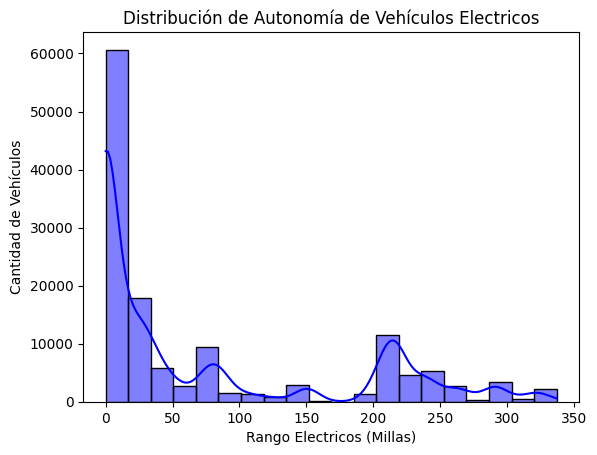

In [15]:
# Histograma de Electric Range antes y después de limpieza

plt.Figure(figsize=(10,5))
sns.histplot(df['Electric Range'], bins=20, kde=True, color='blue')
plt.title('Distribución de Autonomía de Vehículos Electricos')
plt.xlabel('Rango Electricos (Millas)')
plt.ylabel('Cantidad de Vehículos')
plt.show()

In [10]:
# --------- Limpieza y Normalización de los datos ----------- #
# Manejar los datos faltantes

df.fillna(
    {'County': 'unknown', 
    'City': 'unknown',
    'Electric Range': df['Electric Range'].median(),
    'Base MSRP': df['Base MSRP'].median(),
    'Legislative District': 'unknown'
    }, inplace=True)

# Conversión de tipos de datos
df['Postal Code'] = df['Postal Code'].astype(str)
df['Electric Range'] = df['Electric Range'].astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135038 entries, 0 to 135037
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         135038 non-null  object 
 1   County                                             135038 non-null  object 
 2   City                                               135038 non-null  object 
 3   State                                              135038 non-null  object 
 4   Postal Code                                        135038 non-null  object 
 5   Model Year                                         135038 non-null  int64  
 6   Make                                               135038 non-null  object 
 7   Model                                              134789 non-null  object 
 8   Electric Vehicle Type                              135038 non-null  object

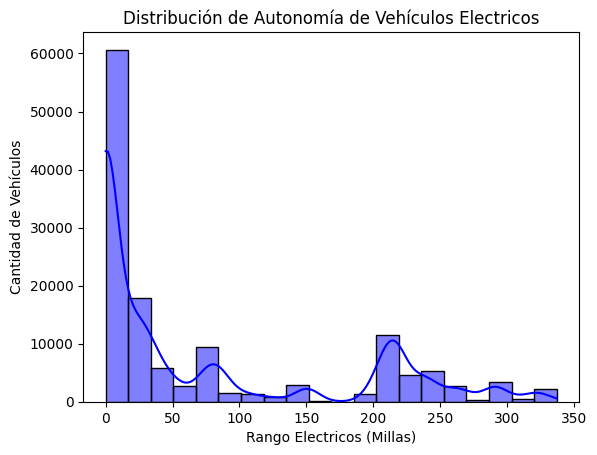

In [14]:
# Histograma de Electric Range antes y después de limpieza

plt.Figure(figsize=(10,5))
sns.histplot(df['Electric Range'], bins=20, kde=True, color='blue')
plt.title('Distribución de Autonomía de Vehículos Electricos')
plt.xlabel('Rango Electricos (Millas)')
plt.ylabel('Cantidad de Vehículos')
plt.show()

## **2️⃣ Análisis de Adopción de Vehículos Eléctricos**

Queremos entender cómo ha crecido la adopción de los EVs, qué marcas dominan el mercado y qué tipos de vehículos son más comunes.

### 📌 **Tareas a realizar:**
- 🔹 **Identificar las marcas y modelos más populares** basándonos en el número de registros.
- 🔹 **Analizar la evolución de los registros** a lo largo del tiempo con la columna *Model Year*.
- 🔹 **Comparar la proporción de diferentes tipos de vehículos eléctricos** (*Battery Electric Vehicle (BEV)* vs. *Plug-in Hybrid Electric Vehicle (PHEV)*).

### 📊 **Gráficos:**
📍 **Gráfico de barras:** *Top 10 marcas con más vehículos registrados* para ver qué fabricantes dominan el mercado.  
📍 **Gráfico de líneas:** *Evolución de los registros de vehículos eléctricos por año* para identificar tendencias en la adopción.  


## **3️⃣ Impacto de la Autonomía y el Precio en la Adopción**

¿La autonomía de un vehículo eléctrico influye en su popularidad? ¿El precio afecta la cantidad de unidades registradas? Aquí analizamos la relación entre estos factores.

### 📌 **Tareas a realizar:**
- 🔹 **Examinar la relación entre Electric Range (autonomía) y Base MSRP (precio base).**
- 🔹 **Determinar si los modelos con mayor autonomía son los más registrados.**
- 🔹 **Comparar la distribución de precios entre diferentes tipos de vehículos eléctricos.**

### 📊 **Gráfico:**
📍 **Scatter Plot:** *Autonomía vs. Precio base* para ver si hay una correlación entre estos dos factores.


## **4️⃣ Elegibilidad para Programas de Combustible Alternativo**

El acceso a incentivos gubernamentales puede influir en la compra de EVs. Vamos a explorar cuántos vehículos cumplen con los requisitos para estos programas.

### 📌 **Tareas a realizar:**
- 🔹 **Determinar la cantidad de vehículos elegibles vs. no elegibles** para programas de combustible alternativo.
- 🔹 **Analizar si los vehículos elegibles tienen características comunes,** como mayor autonomía o menor precio.

### 📊 **Gráfico:**
📍 **Gráfico de pastel:** *Proporción de vehículos elegibles vs. no elegibles* para incentivos gubernamentales.